### Importing the necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Loading the csv file

In [2]:
netflix = pd.read_csv(r"C:\Users\karth\OneDrive\Documents\Artificial Intelligence Course Materials\Self Exploration Projects\Netflix Movies and TV Shows\archive\netflix_titles.csv")

In [3]:
netflix.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [4]:
netflix.shape

(8807, 12)

In [5]:
netflix.dtypes

show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object

In [6]:
netflix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [7]:
netflix.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [8]:
netflix['country'].replace(np.nan, 'Unknown' ,inplace = True)
netflix['cast'].replace(np.nan, 'Unknown',inplace  = True)
netflix['director'].replace(np.nan,'Unknown',inplace = True)

In [9]:
netflix.isnull().sum()

show_id          0
type             0
title            0
director         0
cast             0
country          0
date_added      10
release_year     0
rating           4
duration         3
listed_in        0
description      0
dtype: int64

### Unique rating categories

In [10]:
netflix['rating'].unique()

array(['PG-13', 'TV-MA', 'PG', 'TV-14', 'TV-PG', 'TV-Y', 'TV-Y7', 'R',
       'TV-G', 'G', 'NC-17', '74 min', '84 min', '66 min', 'NR', nan,
       'TV-Y7-FV', 'UR'], dtype=object)

### Content Distribution Over the Years

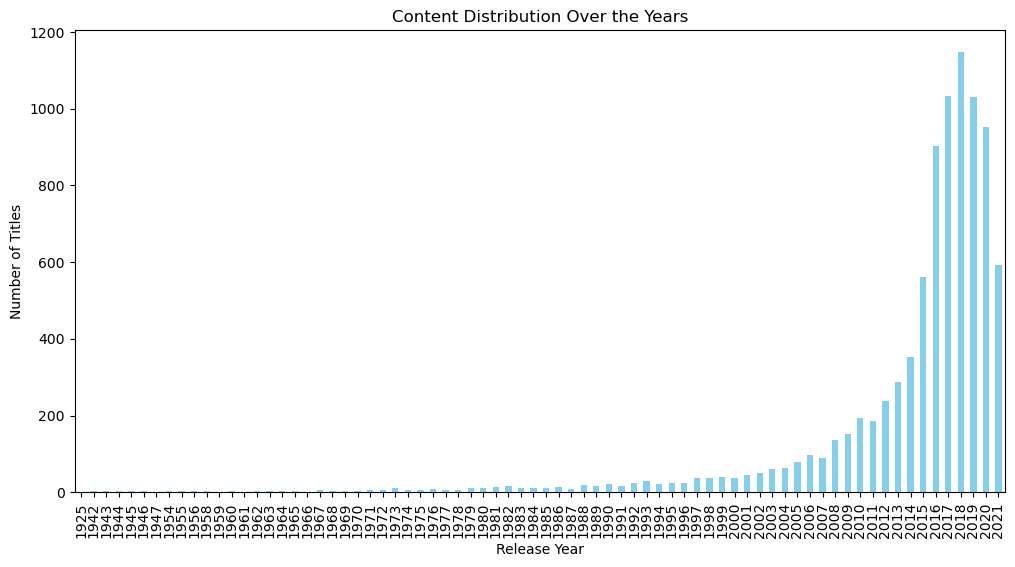

In [11]:
plt.figure(figsize=(12, 6))
netflix['release_year'].value_counts().sort_index().plot(kind='bar', color='skyblue')
plt.title('Content Distribution Over the Years')
plt.xlabel('Release Year')
plt.ylabel('Number of Titles')
plt.show()

### Top Countries Producing Content

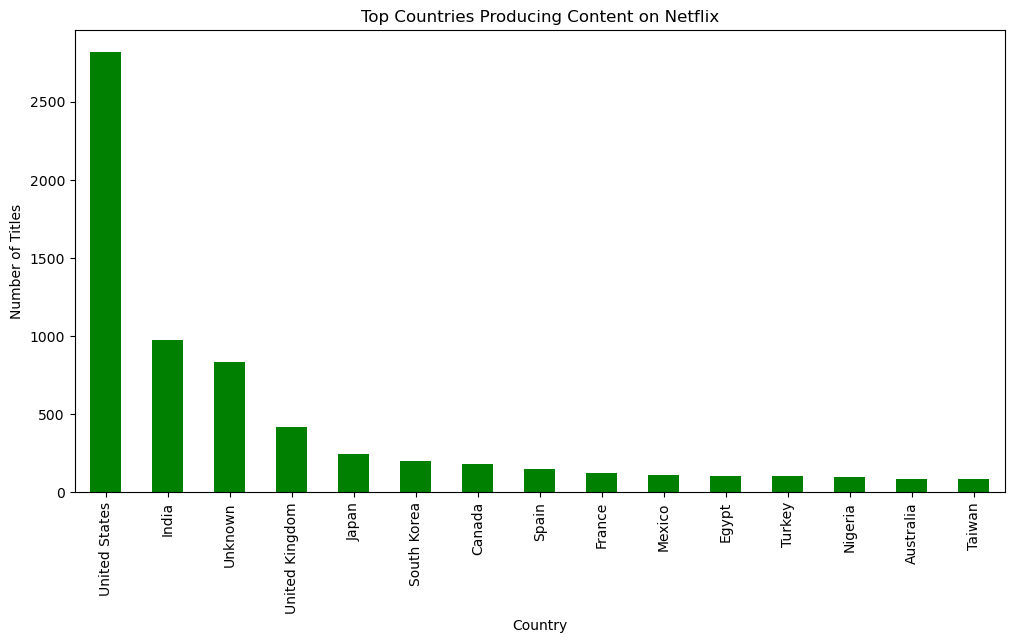

In [12]:
plt.figure(figsize=(12, 6))
netflix['country'].value_counts().head(15).plot(kind='bar', color='green')
plt.title('Top Countries Producing Content on Netflix')
plt.xlabel('Country')
plt.ylabel('Number of Titles')
plt.show()

### Distribution of Content Types (Movies/TV Shows)

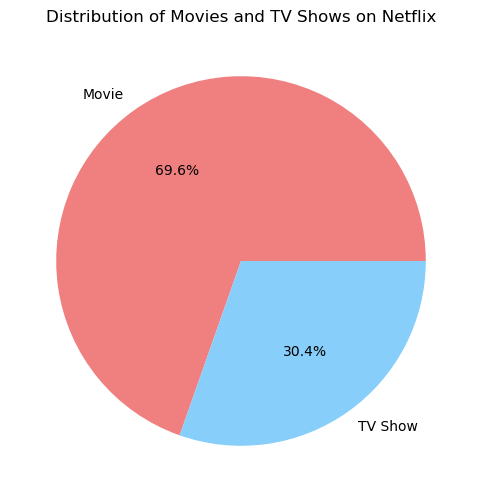

In [13]:
plt.figure(figsize=(8, 6))
netflix['type'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['lightcoral', 'lightskyblue'])
plt.title('Distribution of Movies and TV Shows on Netflix')
plt.ylabel('')
plt.show()

### Top Genres

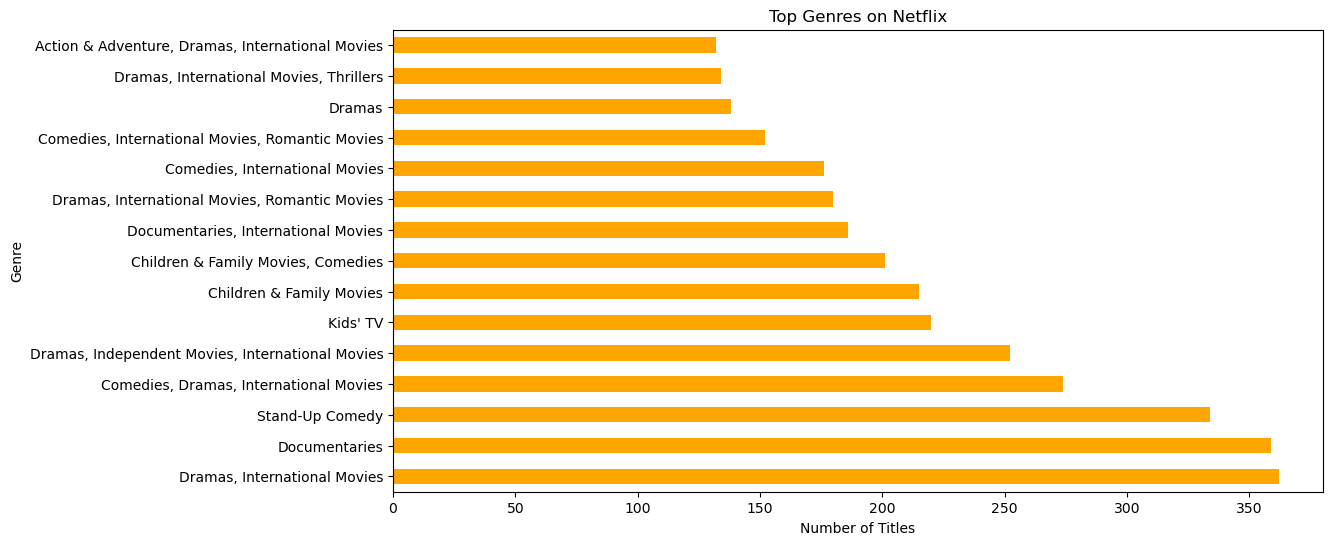

In [14]:
plt.figure(figsize=(12, 6))
netflix['listed_in'].value_counts().head(15).plot(kind='barh', color='orange')
plt.title('Top Genres on Netflix')
plt.xlabel('Number of Titles')
plt.ylabel('Genre')
plt.show()

### Analysis of Audience Ratings

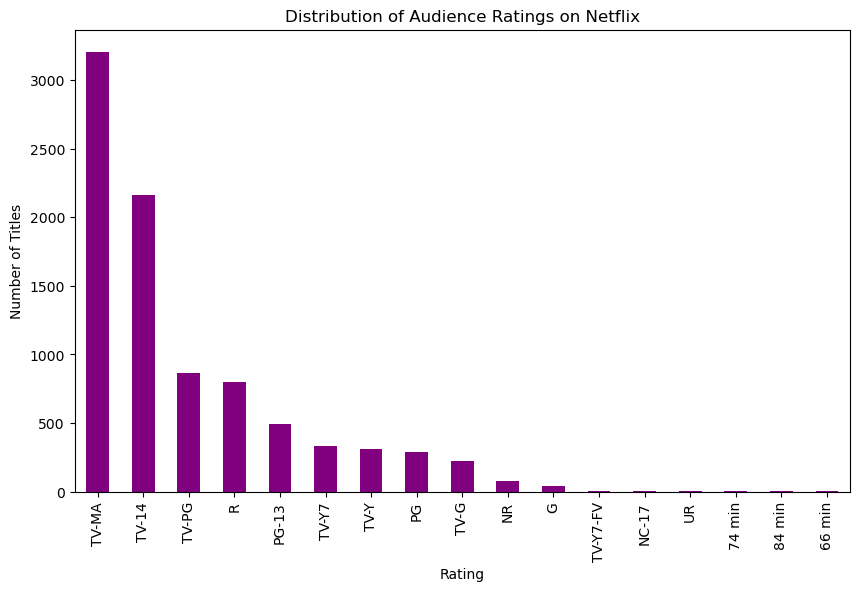

In [15]:
plt.figure(figsize=(10, 6))
netflix['rating'].value_counts().plot(kind='bar', color='purple')
plt.title('Distribution of Audience Ratings on Netflix')
plt.xlabel('Rating')
plt.ylabel('Number of Titles')
plt.show()

### Number of Titles Added Each Year on Netflix

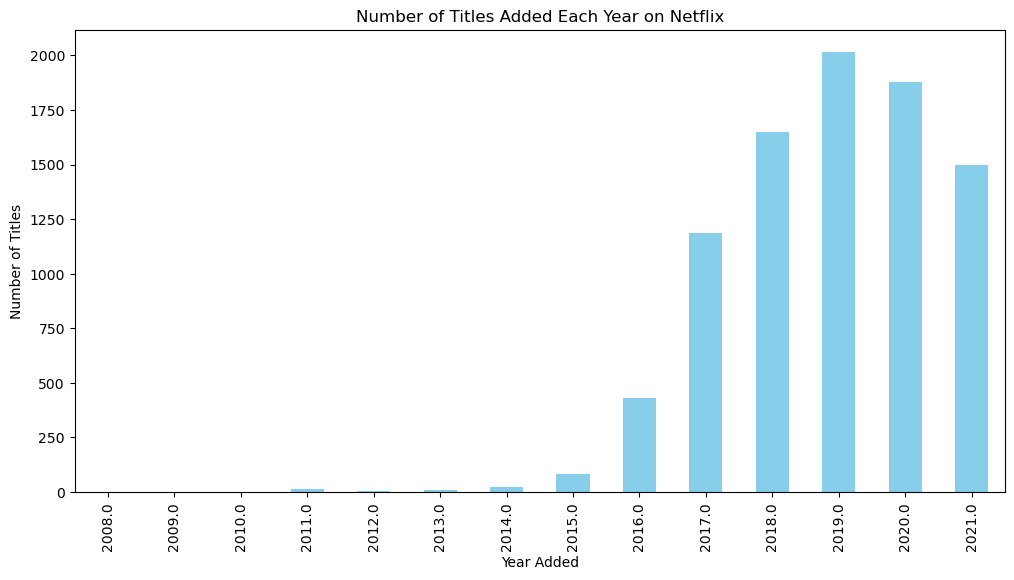

In [16]:
# Convert 'Date Added' to datetime format
netflix['date_added'] = pd.to_datetime(netflix['date_added'])

# Extract year from the 'Date Added' column
netflix['Year Added'] = netflix['date_added'].dt.year

# Group by 'Year Added' and count the number of titles
titles_added_each_year = netflix['Year Added'].value_counts().sort_index()

# Plot the results
titles_added_each_year.plot(kind='bar', figsize=(12, 6), color='skyblue')
plt.title('Number of Titles Added Each Year on Netflix')
plt.xlabel('Year Added')
plt.ylabel('Number of Titles')
plt.show()

### Understanding what content is available in different countries

In [17]:
countries_content = netflix.groupby('country')['title'].count().sort_values(ascending=False)
print(countries_content)

country
United States                                                                          2818
India                                                                                   972
Unknown                                                                                 831
United Kingdom                                                                          419
Japan                                                                                   245
                                                                                       ... 
Ireland, Canada, Luxembourg, United States, United Kingdom, Philippines, India            1
Ireland, Canada, United Kingdom, United States                                            1
Ireland, Canada, United States, United Kingdom                                            1
Ireland, France, Iceland, United States, Mexico, Belgium, United Kingdom, Hong Kong       1
Zimbabwe                                                                

### Identifying similar content by matching text-based features

In [18]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel

# Specify the movie name for which you want to find similar titles
target_movie_name = "Breaking Bad"

# Retrieve the description of the specified movie
target_movie_description = netflix.loc[netflix['title'] == target_movie_name, 'description'].iloc[0]

# Create a TF-IDF vectorizer for the description column
tfidf_vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf_vectorizer.fit_transform(netflix['description'].fillna(''))

# Compute similarity scores for the target movie's description
cosine_similarities = linear_kernel(tfidf_vectorizer.transform([target_movie_description]), tfidf_matrix)

# Print similar titles
similar_titles = list(enumerate(cosine_similarities[0]))
similar_titles = sorted(similar_titles, key=lambda x: x[1], reverse=True)[1:6]

print(f"Movie suggestions similar to '{target_movie_name}':")
for index, score in similar_titles:
    print(netflix['title'].iloc[index], score)

Movie suggestions similar to 'Breaking Bad':
The Book of Sun 0.167243429425053
Alice Junior 0.150060109996789
Iron Ladies 0.14861782363723744
Dismissed 0.14765657341960162
Alexa & Katie 0.1434047385296256


### Does Netflix have more focus on TV Shows than movies in recent years

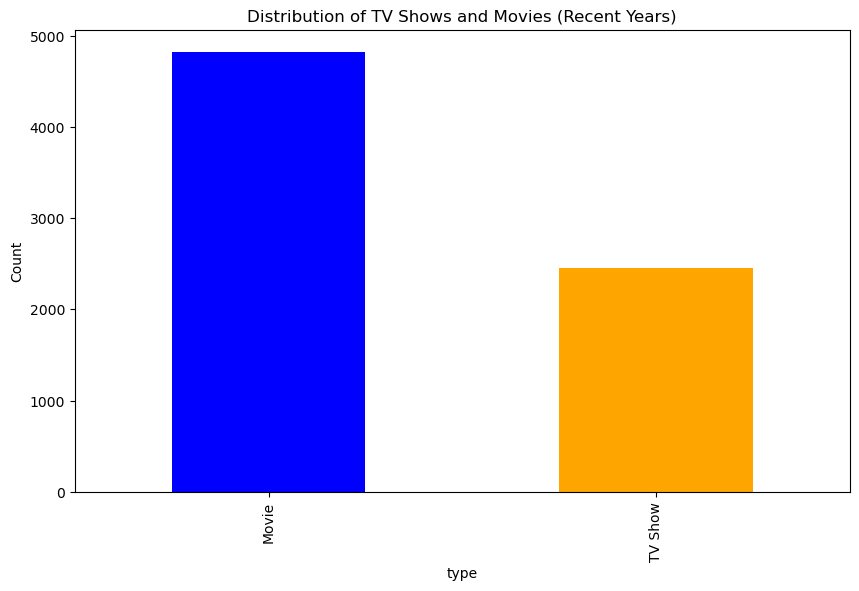

In [19]:
# Filter data for recent years (adjust the threshold as needed)
recent_years_data = netflix[netflix['release_year'] >= 2011]

# Plot the distribution of TV Shows and Movies
plt.figure(figsize=(10, 6))
recent_years_data['type'].value_counts().plot(kind='bar', color=['blue', 'orange'])
plt.title('Distribution of TV Shows and Movies (Recent Years)')
plt.xlabel('type')
plt.ylabel('Count')
plt.show()